<a href="https://colab.research.google.com/github/azdhafin/CV-resume/blob/main/Data%20Analytics_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import platform

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline            # imbalanced-learn’s Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
    VotingClassifier
)
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
from google.colab import files

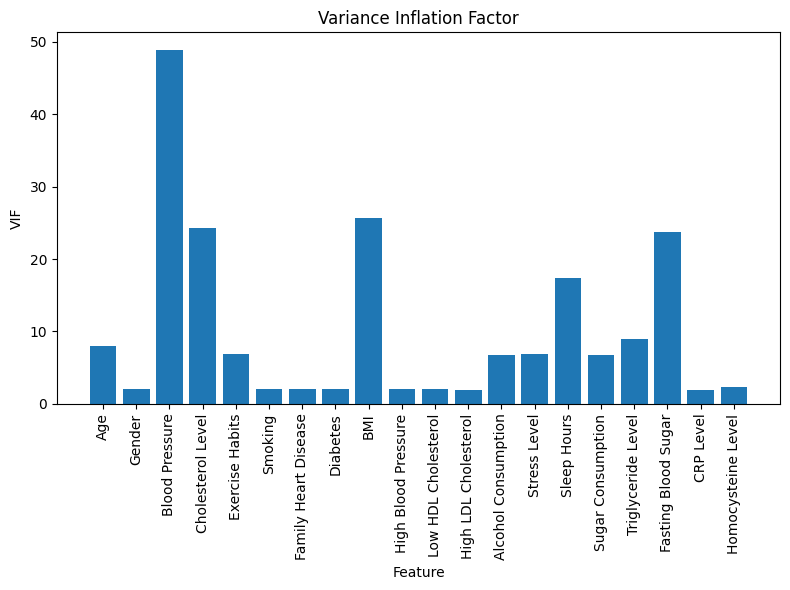

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. 读取数据
df = pd.read_excel('heart_disease_cleaned.xlsx')

# 2. 删除缺失值
df_clean = df.dropna()

# 3. 编码分类变量
# 二值变量映射
yes_no_map = {'Yes': 1, 'No': 0}
df_encoded = df_clean.copy()
binary_cols = [
    'Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
    'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol'
]
for col in binary_cols:
    if col == 'Gender':
        df_encoded[col] = df_encoded[col].map({'Male': 1, 'Female': 0})
    else:
        df_encoded[col] = df_encoded[col].map(yes_no_map)

# 序数变量映射
ord_map = {'Low': 1, 'Medium': 2, 'High': 3, 'None': 0}
ordinal_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']
for col in ordinal_cols:
    df_encoded[col] = df_encoded[col].map(ord_map)

# 4. 将目标变量也映射为二值
df_encoded['Heart Disease Status'] = df_encoded['Heart Disease Status'].map(yes_no_map)

# 5. 计算相关系数矩阵
corr_matrix = df_encoded.corr()

# 6. 计算 VIF（排除目标变量）
X = df_encoded.drop(columns=['Heart Disease Status'])
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# 7. 展示结果
import matplotlib.pyplot as plt

# Plot VIF as Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(vif_data['Variable'], vif_data['VIF'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('VIF')
plt.title('Variance Inflation Factor')
plt.tight_layout()
plt.show()



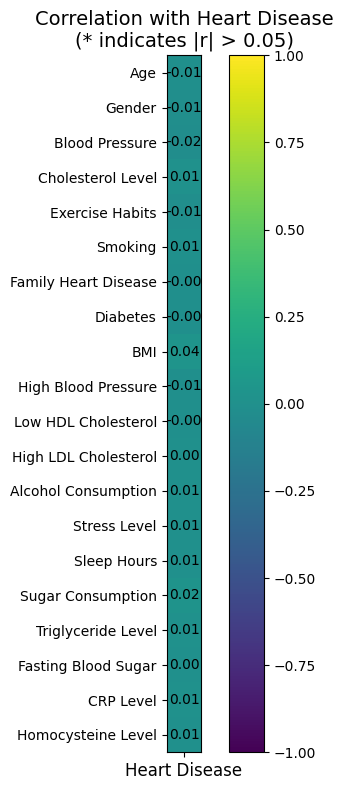

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 重新读取并预处理数据
df = pd.read_excel('heart_disease_cleaned.xlsx')
df_clean = df.dropna()

# 编码
binary_map = {'Yes': 1, 'No': 0}
df_enc = df_clean.copy()
df_enc['Gender'] = df_enc['Gender'].map({'Male': 1, 'Female': 0})
binary_cols = [
    'Smoking', 'Family Heart Disease', 'Diabetes',
    'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol'
]
for col in binary_cols:
    df_enc[col] = df_enc[col].map(binary_map)

ord_map = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}
ord_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']
for col in ord_cols:
    df_enc[col] = df_enc[col].map(ord_map)

df_enc['Heart Disease Status'] = df_enc['Heart Disease Status'].map(binary_map)

# 计算与心脏病状态的相关性
corr_target = df_enc.corr()[['Heart Disease Status']].drop('Heart Disease Status')

# 绘制与心脏病状态相关性热图
plt.figure(figsize=(6, 8))
plt.imshow(corr_target.values, vmin=-1, vmax=1)
plt.colorbar()

# 标注相关系数及星号
for i, val in enumerate(corr_target['Heart Disease Status']):
    mark = '*' if abs(val) > 0.05 else ''
    plt.text(0, i, f"{val:.2f}{mark}", ha='center', va='center', fontsize=10)

plt.yticks(range(len(corr_target.index)), corr_target.index, fontsize=10)
plt.xticks([0], ['Heart Disease'], fontsize=12)
plt.title('Correlation with Heart Disease\n(* indicates |r| > 0.05)', fontsize=14)
plt.tight_layout()
plt.show()



Because the absolute value of the correlation coefficient between a single feature and whether or not a person has heart disease is less than 0.05, this indicates that any feature cannot effectively explain or predict the prevalence of heart disease when used alone, that is, a single feature has no significant statistical determinant for predicting the prevalence. In addition, the VIF values ​​of multiple features in the variance inflation factor (VIF) analysis clearly exceeded 10, especially blood pressure, cholesterol level, BMI, and fasting blood sugar, indicating that there is serious multicollinearity between these variables, and the VIF values ​​of most other features also exceed 5, further indicating that there is an obvious problem of collinearity within the overall feature space, and that there is a high correlation between features, which reduces the stability and reliability of multiple linear regression. Therefore, this data set is not suitable for direct use of a linear regression model for predictive analysis

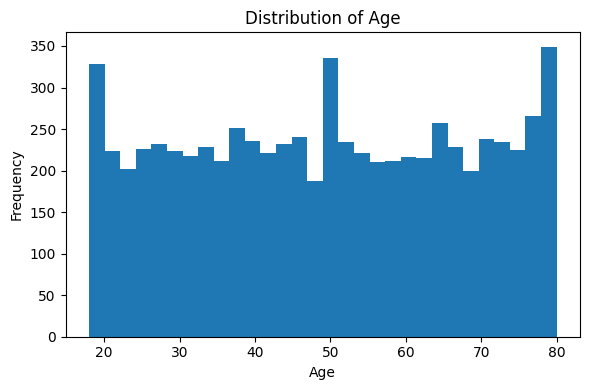

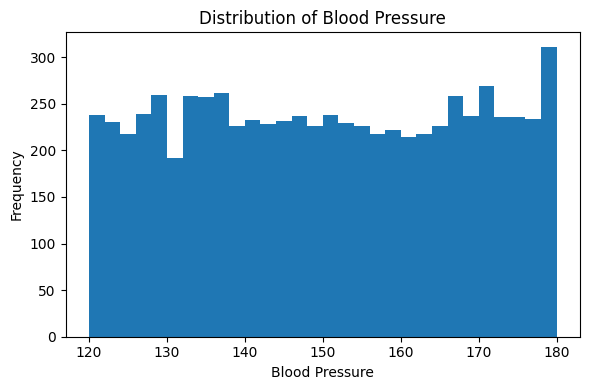

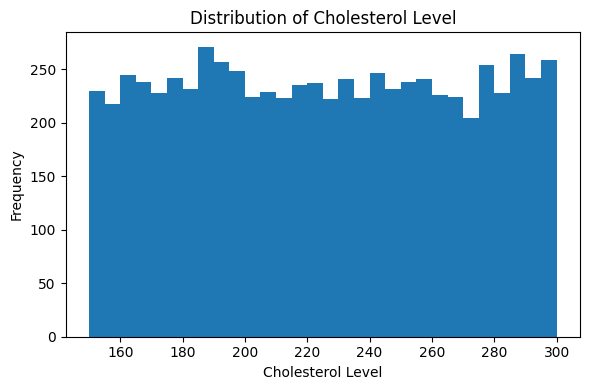

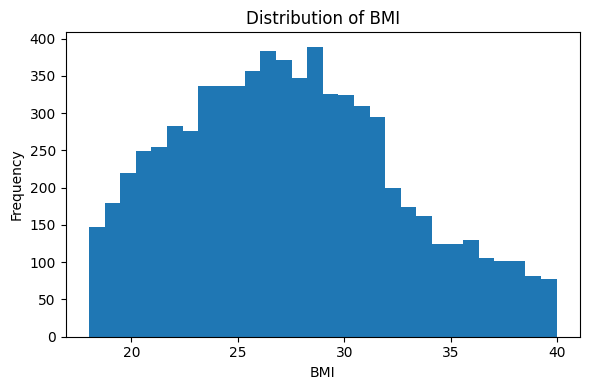

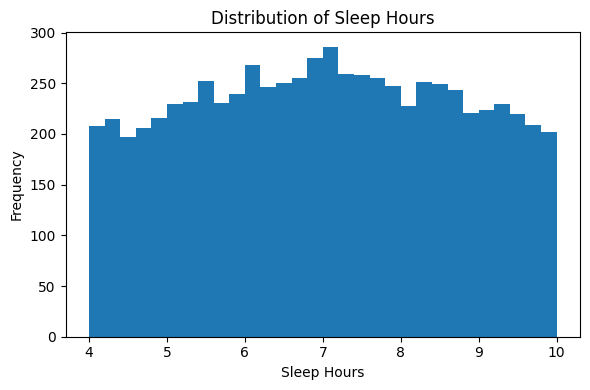

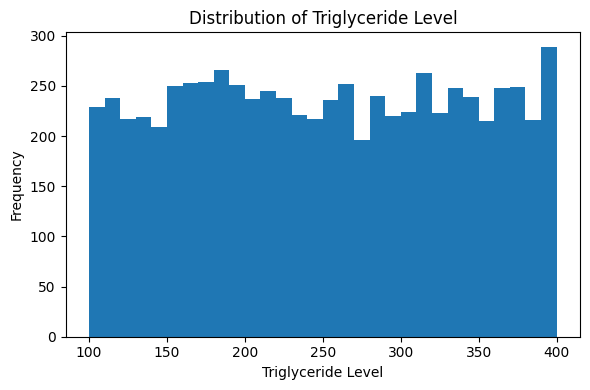

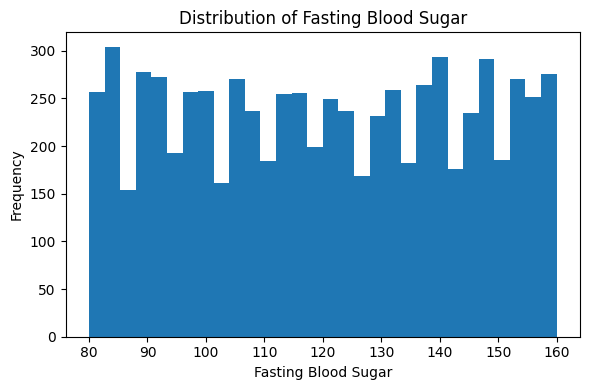

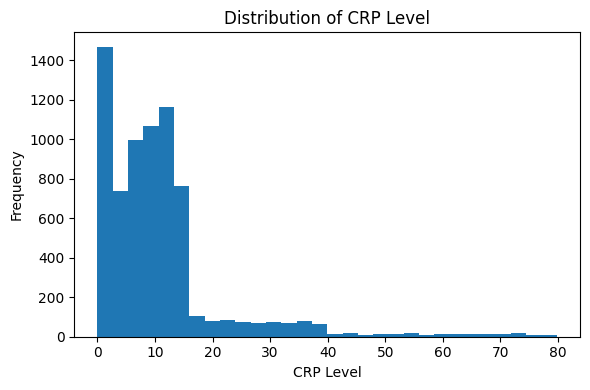

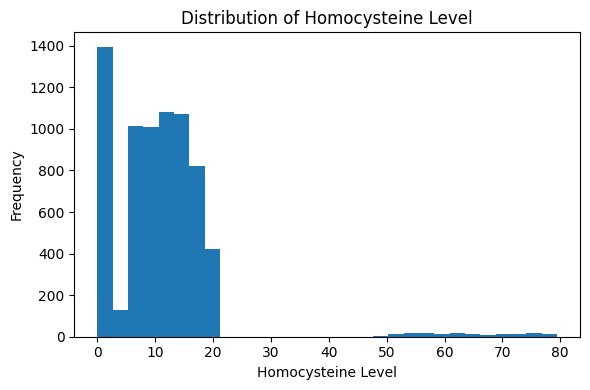

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_excel('heart_disease_cleaned.xlsx')
df_clean = df.dropna()

# 连续型特征列表
continuous_features = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
    'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]

# 绘制每个连续变量的分布直方图
for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df_clean[feature], bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()


Only a few features show obvious skewed distribution or approximate normal distribution, and most features show uniform distribution or close to uniform distribution, which indicates that the distribution characteristics of the data do not conform to the basic assumptions of the linear regression model on data distribution. Specifically, the uniformly distributed features lack obvious central trends and cannot provide effective linear division basis, making it difficult for the linear regression model to accurately capture and characterize the potential linear relationship between variables. Therefore, it is recommended to consider nonlinear regression models or other more flexible machine learning models to improve the accuracy and robustness of predictions.

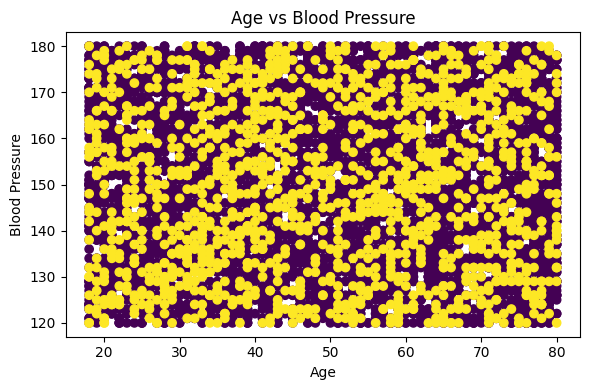

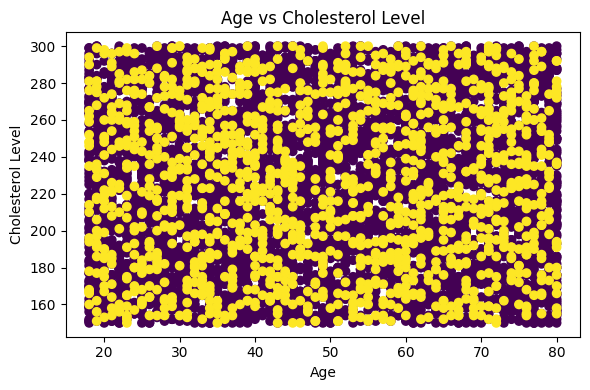

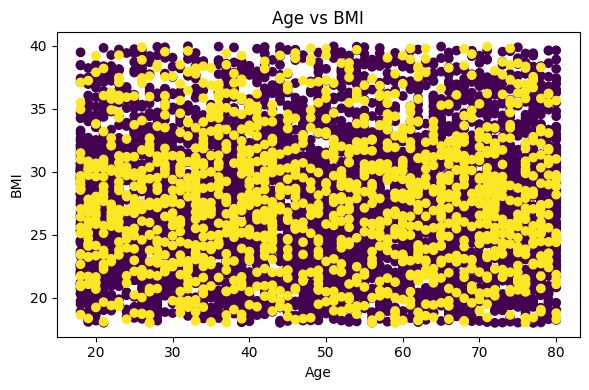

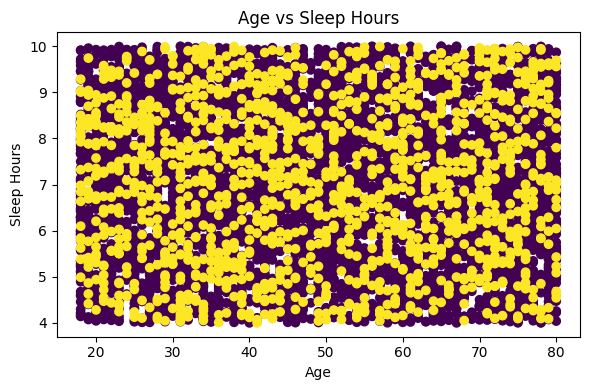

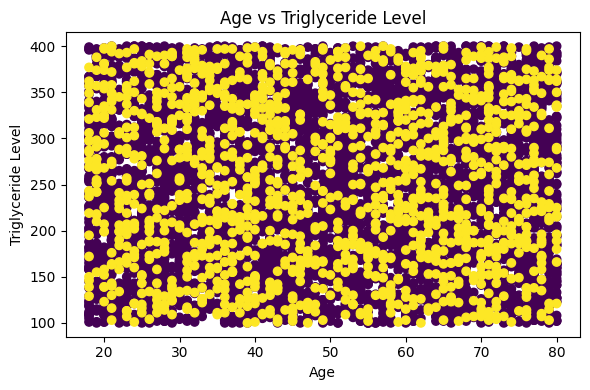

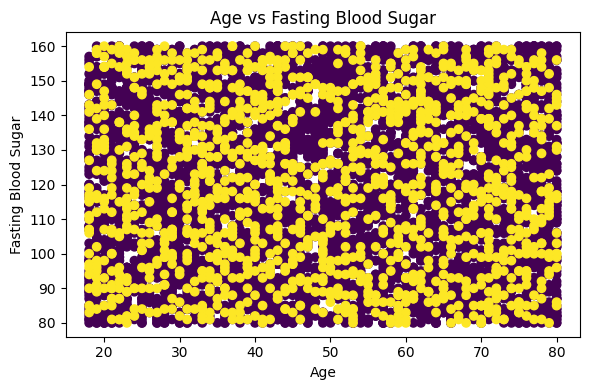

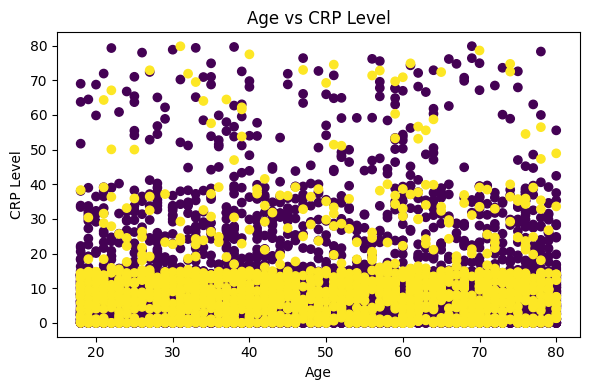

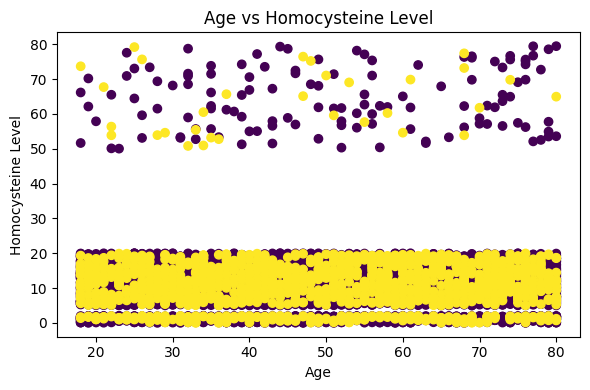

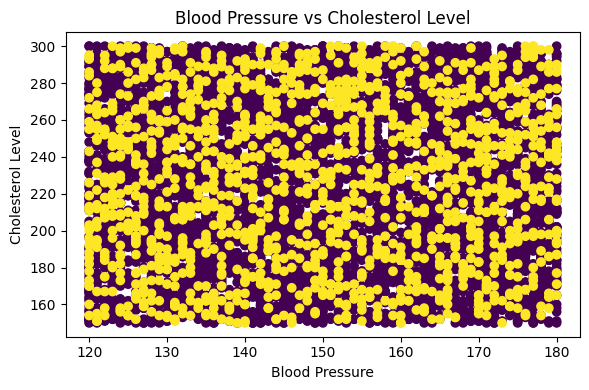

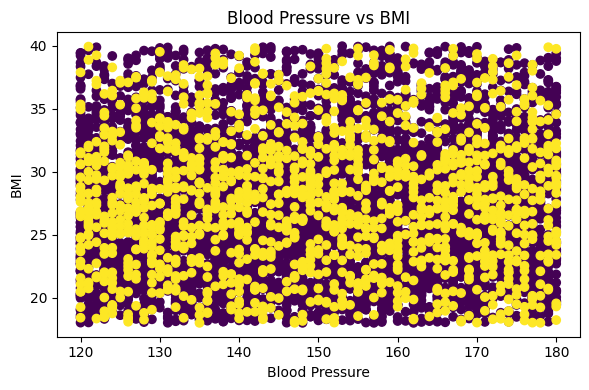

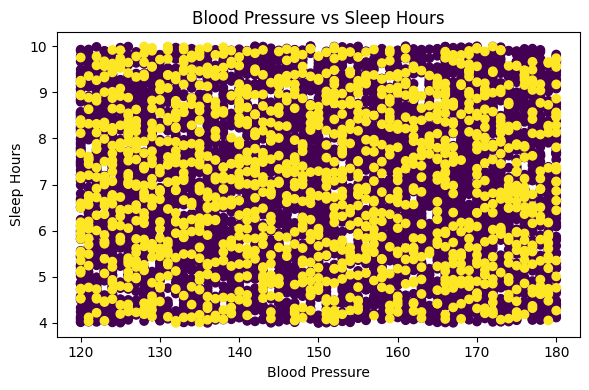

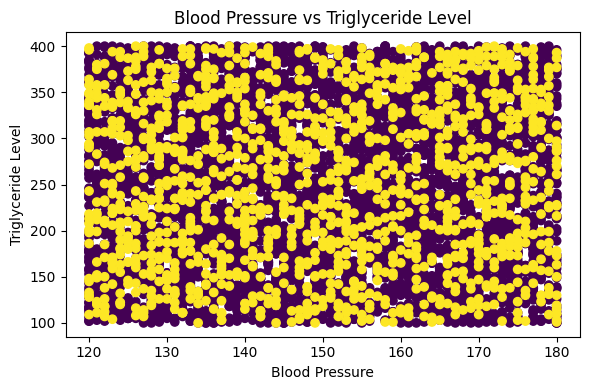

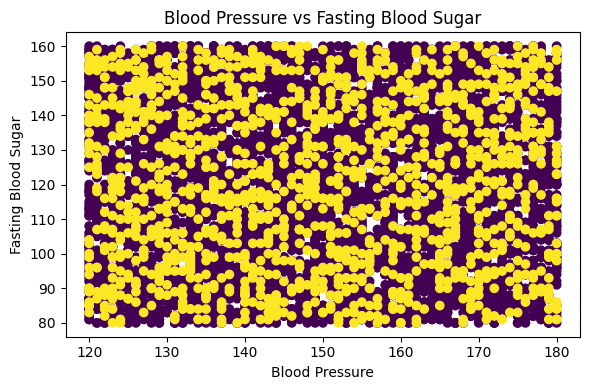

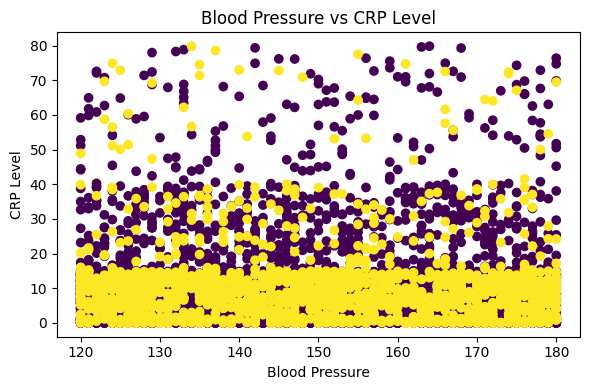

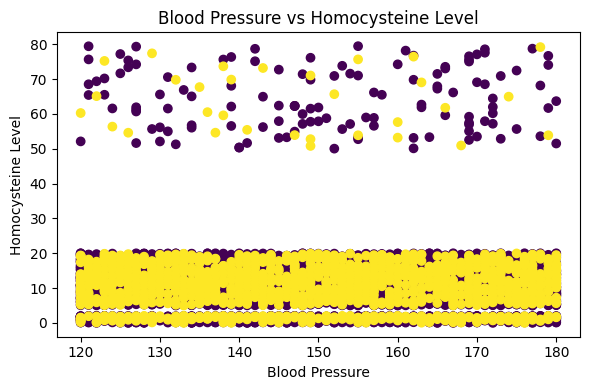

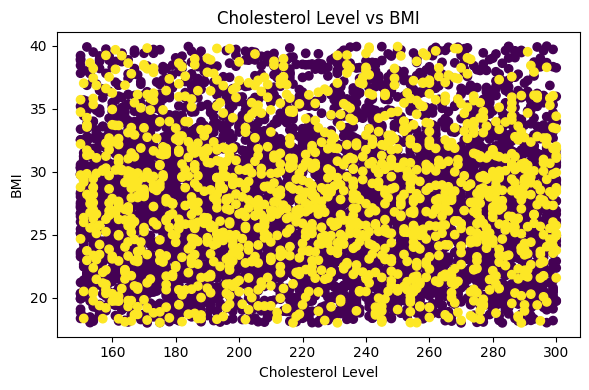

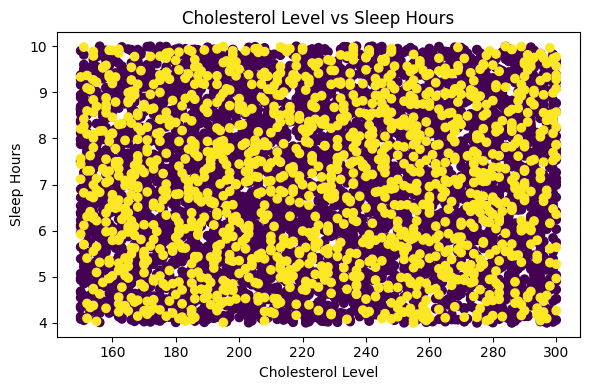

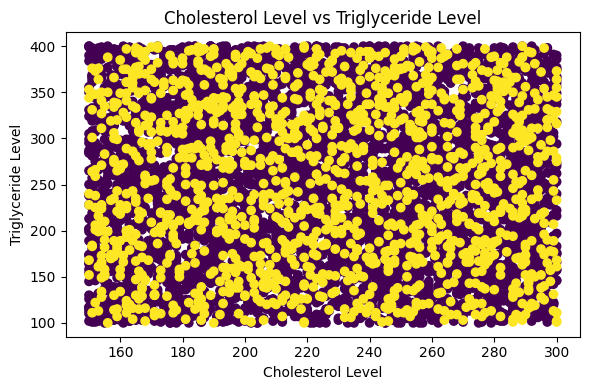

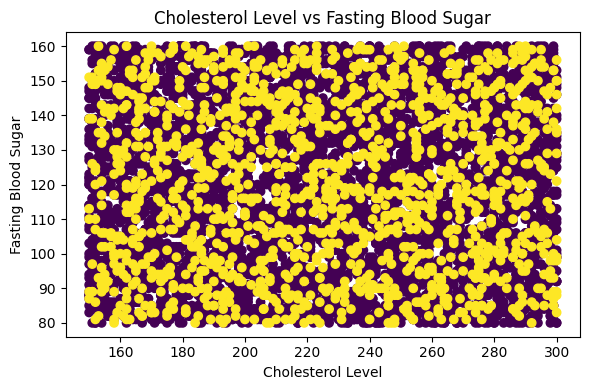

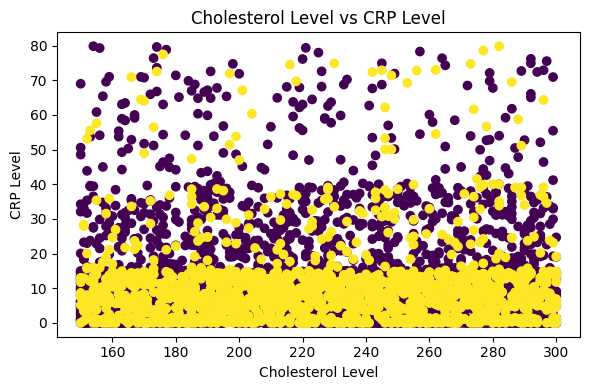

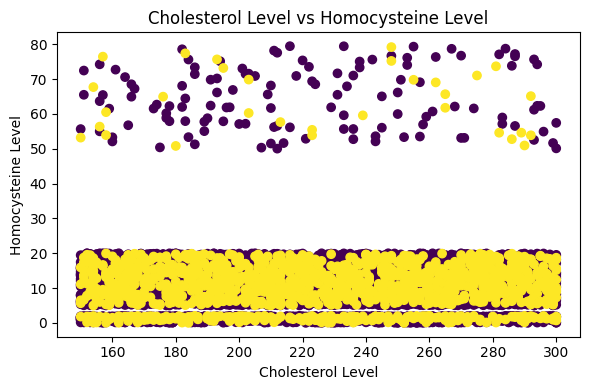

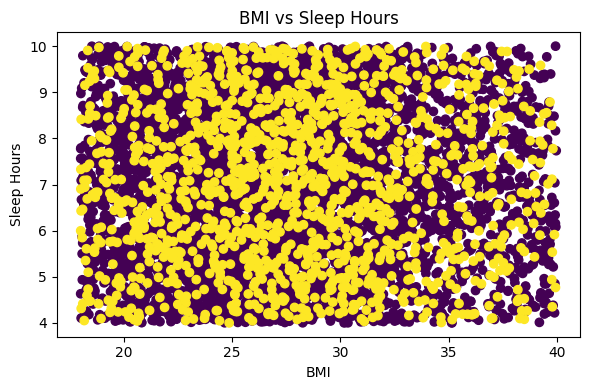

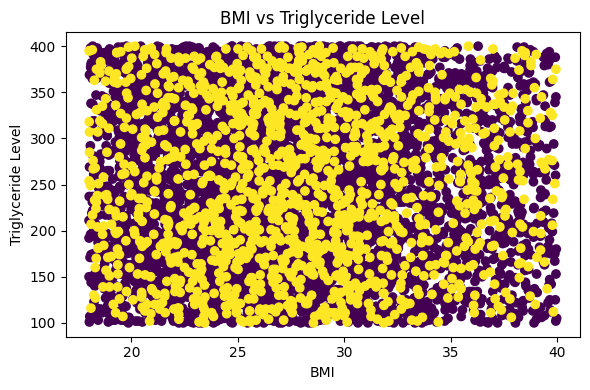

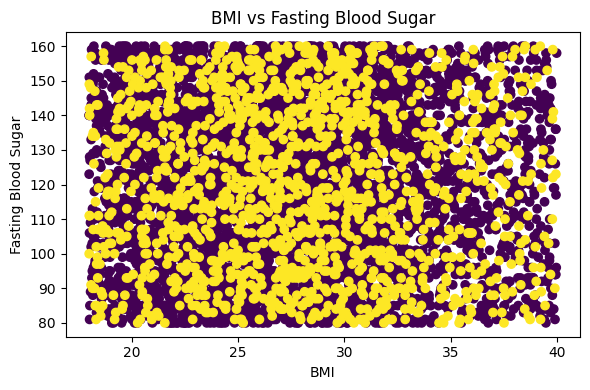

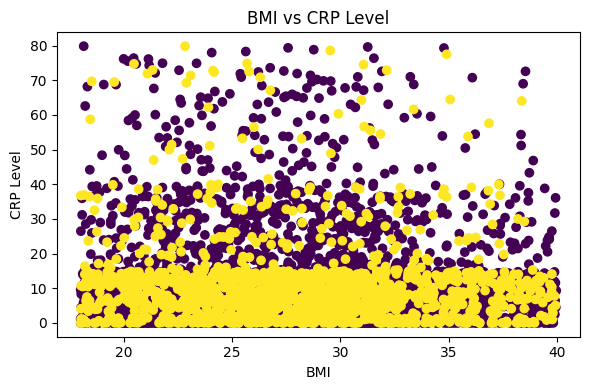

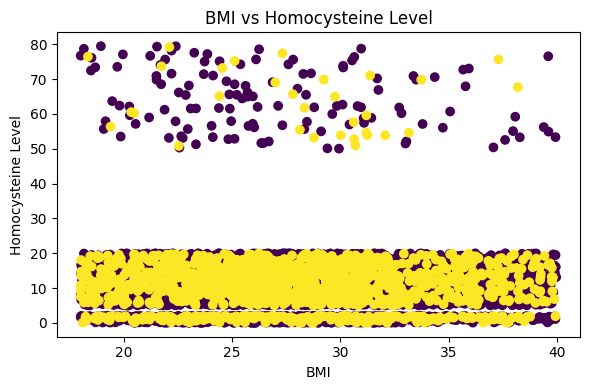

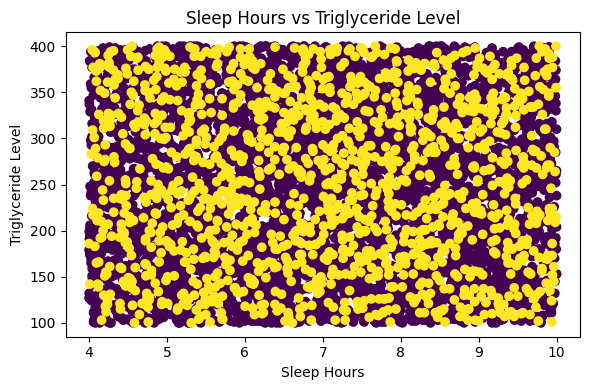

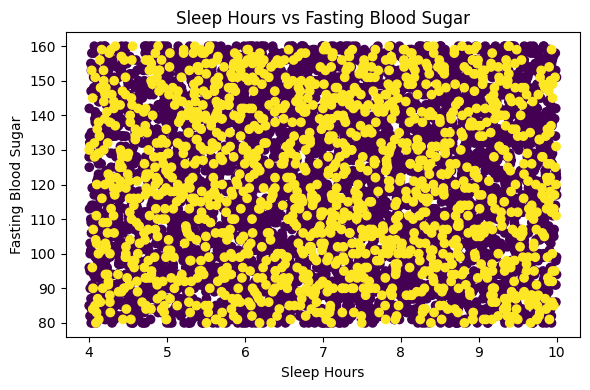

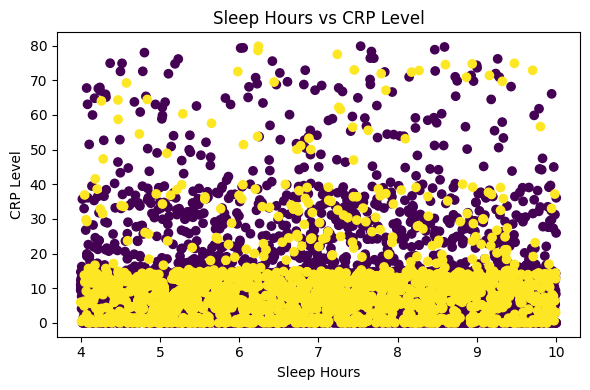

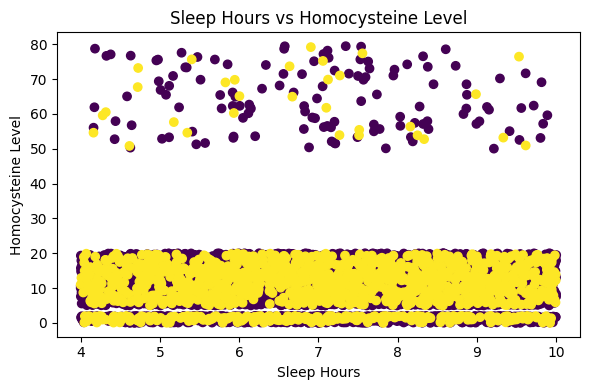

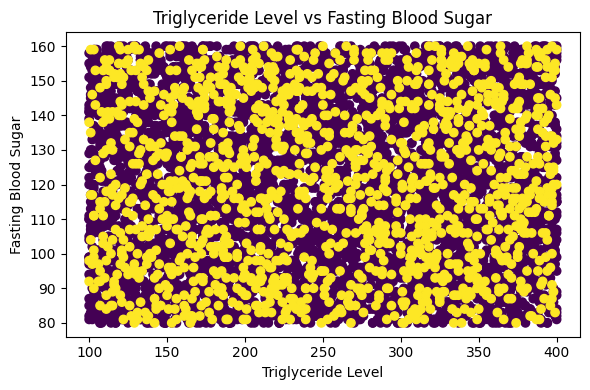

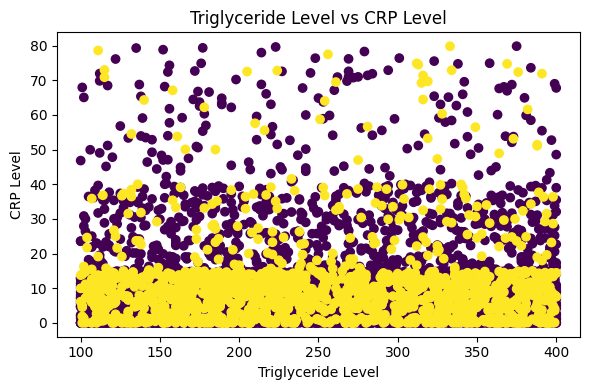

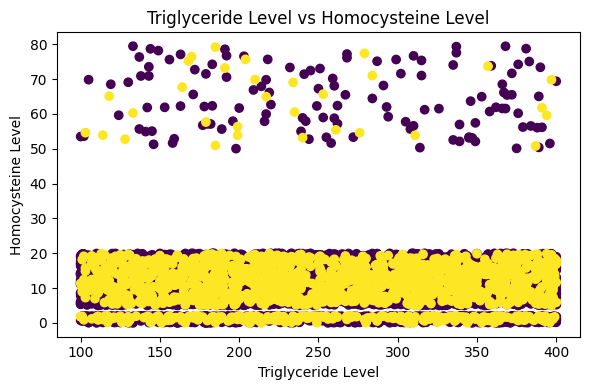

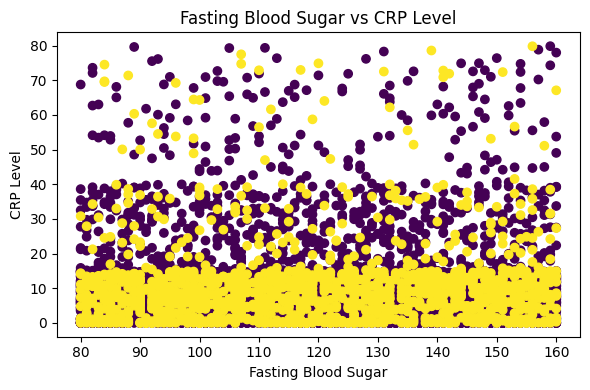

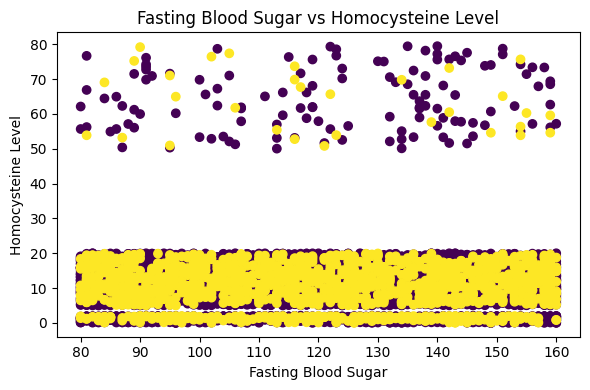

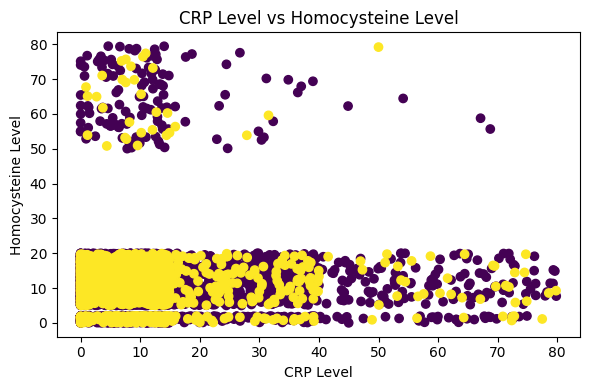

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# 读取并预处理数据
df = pd.read_excel('heart_disease_cleaned.xlsx')
df_clean = df.dropna()

binary_map = {'Yes': 1, 'No': 0}
df_enc = df_clean.copy()
df_enc['Gender'] = df_enc['Gender'].map({'Male': 1, 'Female': 0})
for col in ['Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure',
            'Low HDL Cholesterol', 'High LDL Cholesterol']:
    df_enc[col] = df_enc[col].map(binary_map)
ord_map = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}
for col in ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']:
    df_enc[col] = df_enc[col].map(ord_map)
df_enc['Heart Disease Status'] = df_enc['Heart Disease Status'].map(binary_map)

# 连续型特征
continuous_features = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
    'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]

# 两两组合散点图
for feat1, feat2 in itertools.combinations(continuous_features, 2):
    plt.figure(figsize=(6, 4))
    plt.scatter(df_enc[feat1], df_enc[feat2], c=df_enc['Heart Disease Status'])
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.title(f'{feat1} vs {feat2}')
    plt.tight_layout()
    plt.show()


It is obvious from the above those scatter plots (Fasting Blood Sugar vs. Homocysteine ​​Level and CRP Level vs. Homocysteine ​​Level etc.) that the data points are highly mixed in two-dimensional space and do not have obvious linear separability. This distribution characteristic indicates that there is no stable linear relationship between features, and even in linear dimensionality reduction methods such as principal component analysis (PCA), it is impossible to achieve effective feature space transformation to improve the performance of linear models.

Therefore, we no longer continue to try models based on linear assumptions, but turn to data modeling methods that are more suitable for handling nonlinear and complex patterns: **Random Forest (Random Forest) and Gradient Boosting (Boosting) methods**. These ensemble learning methods can automatically handle nonlinear relationships and high-order interaction features between variables, improving model fitting ability and generalization performance.

Due to the class imbalance problem of sample labels (positive examples of heart disease are far less than negative examples), we performed the following data rebalancing:

* **Synthesized positive samples (such as SMOTE oversampling)** to increase the proportion of positive samples in the training set;
* **Downsampled negative samples** to reduce their dominance;
* And **adjusted the class weight or penalty strength of the classifier (such as random forest)** during the model construction process to increase the model's sensitivity to the minority class (positive examples) and reduce the risk of misjudgment.

This combination of methods enables us to build a more robust classification model with practical prediction capabilities under the premise that the original feature distribution is irregular and linearly inseparable.

5‐fold CV AUC scores:
  GradientBoosting: 0.5115
  RandomForest   : 0.5098


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


  SoftVoting     : 0.5120


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



===== Soft‐Voting Performance =====
AUC: 0.5081
                  precision    recall  f1-score   support

No Heart Disease       0.80      0.47      0.59      1600
   Heart Disease       0.20      0.54      0.30       400

        accuracy                           0.48      2000
       macro avg       0.50      0.51      0.44      2000
    weighted avg       0.68      0.48      0.53      2000

[[754 846]
 [184 216]]


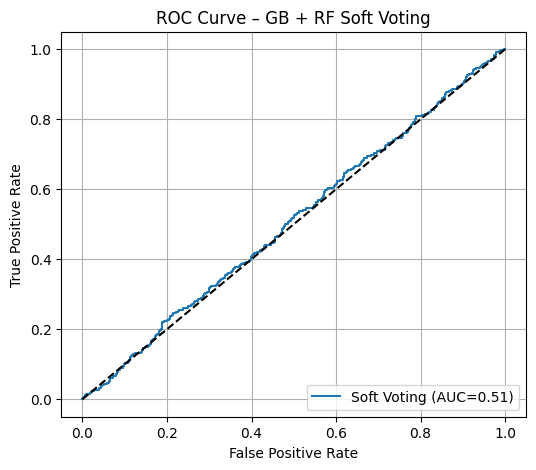


===== Mixture of Experts Performance =====
AUC: 0.5229
                  precision    recall  f1-score   support

No Heart Disease       0.80      0.93      0.86      1600
   Heart Disease       0.16      0.06      0.08       400

        accuracy                           0.76      2000
       macro avg       0.48      0.49      0.47      2000
    weighted avg       0.67      0.76      0.70      2000

[[1488  112]
 [ 378   22]]


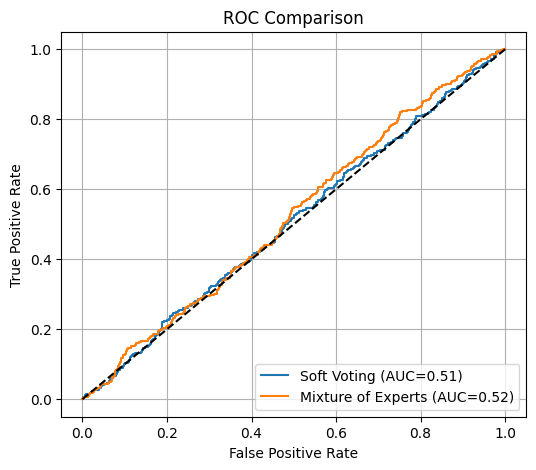

In [ ]:
import sys, platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# -------------------------- 1. Load & Map -------------------
df = pd.read_excel('heart_disease_cleaned.xlsx')

# Binarize the target
y = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})

# Feature set
X = df.drop(columns=['Heart Disease Status'])

# Map binary categorical features to 0/1
bin_cols = [
    'Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
    'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol'
]
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})
for col in bin_cols[1:]:
    X[col] = X[col].map({'Yes': 1, 'No': 0})

# One‐hot encode multiclass features
multi_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']
X = pd.get_dummies(X, columns=multi_cols, drop_first=True)

# -------------------------- 2. Split Data -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------- 3. Define Pipelines -----------------------
def make_pipeline(estimator):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler',  StandardScaler()),
        ('smote',   SMOTE(sampling_strategy=1.0, random_state=42)),
        ('clf',     estimator)
    ])

pipe_gb = make_pipeline(
    HistGradientBoostingClassifier(
        max_iter=500,
        class_weight={0:1, 1:10},
        random_state=42
    )
)
pipe_rf = make_pipeline(
    RandomForestClassifier(
        n_estimators=500,
        class_weight={0:10, 1:1},
        random_state=42,
        n_jobs=-1
    )
)

# Soft‐voting ensemble for对比
voting = VotingClassifier(
    estimators=[('gb', pipe_gb), ('rf', pipe_rf)],
    voting='soft',
    weights=[1, 1],
    n_jobs=-1
)

# -------------------------- 4. Cross‐Validation -----------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models = [
    ('GradientBoosting', pipe_gb),
    ('RandomForest',     pipe_rf),
    ('SoftVoting',       voting)
]

print("5‐fold CV AUC scores:")
for name, model in models:
    auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    print(f"  {name:15s}: {auc:.4f}")

# -------------------------- 5. Soft‐Voting Test‐Set Evaluation ---------------------
voting.fit(X_train, y_train)
y_proba_v = voting.predict_proba(X_test)[:, 1]
y_pred_v  = voting.predict(X_test)

print("\n===== Soft‐Voting Performance =====")
print("AUC:", roc_auc_score(y_test, y_proba_v).round(4))
print(classification_report(y_test, y_pred_v, target_names=['No Heart Disease','Heart Disease']))
print(confusion_matrix(y_test, y_pred_v))

# ROC Curve for Soft‐Voting
fpr_v, tpr_v, _ = roc_curve(y_test, y_proba_v)
plt.figure(figsize=(6,5))
plt.plot(fpr_v, tpr_v, label=f"Soft Voting (AUC={roc_auc_score(y_test,y_proba_v):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – GB + RF Soft Voting")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# -------------------------- 6. Mixture of Experts -----------------------
# 6.1 先训练两个专家模型
pipe_gb.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

# 6.2 对训练集，计算两个专家的预测概率与真实标签的绝对误差，生成门控目标
gb_proba_train = pipe_gb.predict_proba(X_train)[:,1]
rf_proba_train = pipe_rf.predict_proba(X_train)[:,1]
err_gb = np.abs(gb_proba_train - y_train)
err_rf = np.abs(rf_proba_train - y_train)
# 如果 rf 误差更小，则标签为1，否则为0
gate_target = (err_rf < err_gb).astype(int)

# 6.3 门控网络预处理（不做 SMOTE，但做缺失值填充和标准化）
gating_pre = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])
Xg_train = gating_pre.fit_transform(X_train)
Xg_test  = gating_pre.transform(X_test)

# 6.4 训练逻辑回归作为门控网络
gating_model = LogisticRegression(random_state=42)
gating_model.fit(Xg_train, gate_target)

# 6.5 在测试集上获得专家预测与门控概率
gb_proba_test = pipe_gb.predict_proba(X_test)[:,1]
rf_proba_test = pipe_rf.predict_proba(X_test)[:,1]
gate_proba   = gating_model.predict_proba(Xg_test)[:,1]  # P(使用 RF 的权重)

# 6.6 加权融合
y_proba_moe = (1 - gate_proba) * gb_proba_test + gate_proba * rf_proba_test
y_pred_moe  = (y_proba_moe >= 0.5).astype(int)

# 6.7 评估 Mixture of Experts
print("\n===== Mixture of Experts Performance =====")
print("AUC:", roc_auc_score(y_test, y_proba_moe).round(4))
print(classification_report(y_test, y_pred_moe, target_names=['No Heart Disease','Heart Disease']))
print(confusion_matrix(y_test, y_pred_moe))

# ROC 曲线比较
fpr_m, tpr_m, _ = roc_curve(y_test, y_proba_moe)
plt.figure(figsize=(6,5))
plt.plot(fpr_v, tpr_v, label=f"Soft Voting (AUC={roc_auc_score(y_test,y_proba_v):.2f})")
plt.plot(fpr_m, tpr_m, label=f"Mixture of Experts (AUC={roc_auc_score(y_test,y_proba_moe):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

